# Homework 01  
# Basic Goal  
Implement polynomial curve fitting in python and with pytorch (optionally).
## Requirements  
* Programming language: python3 
* Optional package: pytorch web
* Plot the results in matplotlib, Introduction in ChineseTutorial

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Sample the function curve of y=sin(x) with Gaussian noise

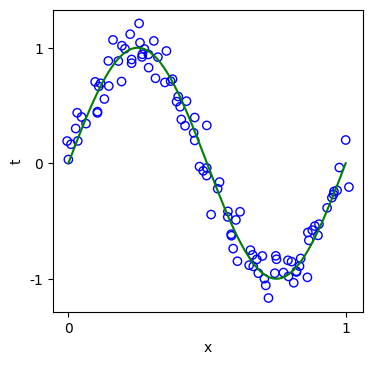

In [2]:
def gaussian_fitting(num_sample, mu=0, sigma=0.1):
    x = np.linspace(0, 2 * np.pi, num_sample, endpoint=True)
    y = np.sin(x)

    x[1: -1] += np.random.randn(num_sample - 2) * sigma + mu
    y += np.random.randn(num_sample) * sigma + mu
    return x, y

def init_plot():
    plt.figure(figsize=(4,4), dpi=100)
    plt.xlabel('x')
    plt.xticks([0, 2 * np.pi], ['0', '1'])
    plt.ylabel('t')
    plt.yticks([-1, 0, 1], ['-1', '0', '1'])
    x = np.arange(0, 2 * np.pi, 0.001)
    y = np.sin(x)
    plt.plot(x, y, color='green')

init_plot()
x, y = gaussian_fitting(num_sample=100)
plt.scatter(x, y, marker='o', color='none', edgecolor='blue')
plt.show()

## 2. Fit degree 3 and 9 curves in 10 samples

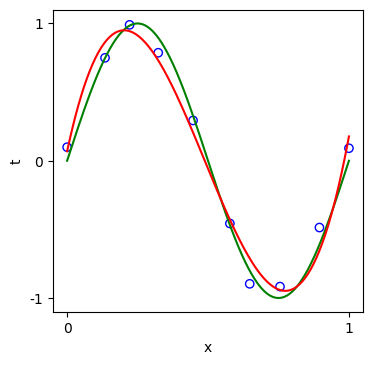

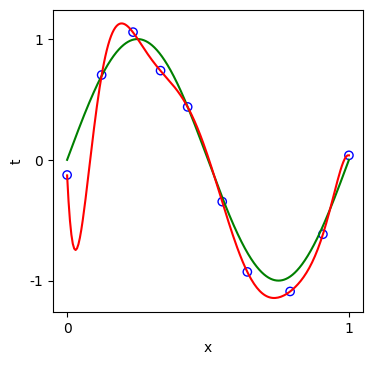

In [3]:
def polynomial_fitting(num_sample, degree):
    x, y = gaussian_fitting(num_sample)
    plt.scatter(x, y, marker='o', color='none', edgecolor='blue')
    H = np.ones((num_sample, degree + 1))
    for i in range(degree):
        H[:, i+1] = H[:, i] * x
    w = np.linalg.inv(H.T @ H) @ H.T @ y
    
    x = np.linspace(0, 2 * np.pi, 200, endpoint=True)
    H = np.ones((200, degree + 1))
    for i in range(degree):
        H[:, i+1] = H[:, i] * x
    y = H @ w
    plt.plot(x, y, color='red')

init_plot()
polynomial_fitting(num_sample=10, degree=3)
plt.show()
init_plot()
polynomial_fitting(num_sample=10, degree=9)
plt.show()

## 3. Fit degree 9 curves in 15 and 100 samples

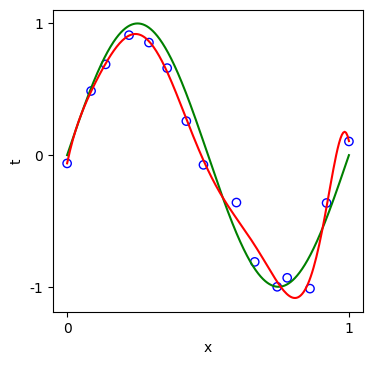

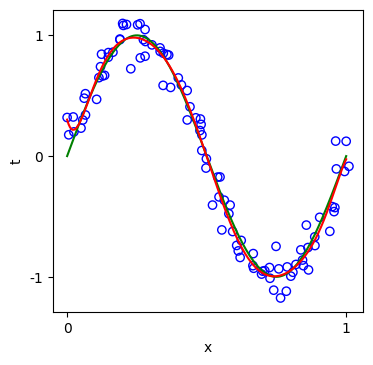

In [4]:
init_plot()
polynomial_fitting(num_sample=15, degree=9)
plt.show()
init_plot()
polynomial_fitting(num_sample=100, degree=9)
plt.show()

## 4. Fit degree 9 curve in 10 samples but with regularization term

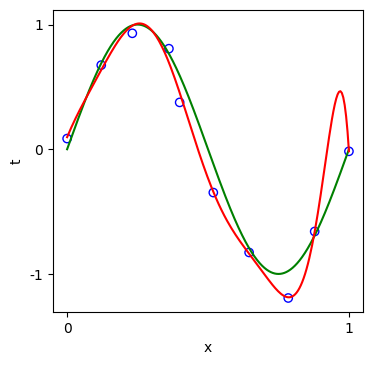

In [5]:
def polynomial_reg_fitting(num_sample, degree, reg):
    x, y = gaussian_fitting(num_sample)
    plt.scatter(x, y, marker='o', color='none', edgecolor='blue')
    H = np.ones((num_sample, degree + 1))
    for i in range(degree):
        H[:, i+1] = H[:, i] * x
    w = np.linalg.inv(H.T @ H + reg * np.eye(degree + 1)) @ H.T @ y
    
    x = np.linspace(0, 2 * np.pi, 200, endpoint=True)
    H = np.ones((200, degree + 1))
    for i in range(degree):
        H[:, i+1] = H[:, i] * x
    y = H @ w
    plt.plot(x, y, color='red')

init_plot()
polynomial_reg_fitting(num_sample=10, degree=9, reg=np.exp(-6))
plt.show()

# Advanced Goal  
Implement Bezier (Bernstein basis)  curve fitting in python and with pytorch (optionally).


In [6]:
import numpy as np
import matplotlib.pyplot as plt

class Bezier():
    def __init__(self, t_points, points):
        self.t_points = t_points
        self.points = points

    def Bernstein(self, t, p1, p2):
        q = (1 - t) * p1 + t * p2

        return q

    def Point(self, t):
        newpoints = self.points
        while len(newpoints) > 1:
            p = []
            for i in range(0, len(newpoints) - 1):
                p += [self.Bernstein(t, newpoints[i], newpoints[i + 1])]
            newpoints = p

        return newpoints[0]

    def Curve(self):
        curve = np.array([[0.0] * len(self.points[0])])
        for t in self.t_points:
            curve = np.append(curve, [self.Point(t)], axis=0)
        curve = np.delete(curve, 0, 0)

        return curve


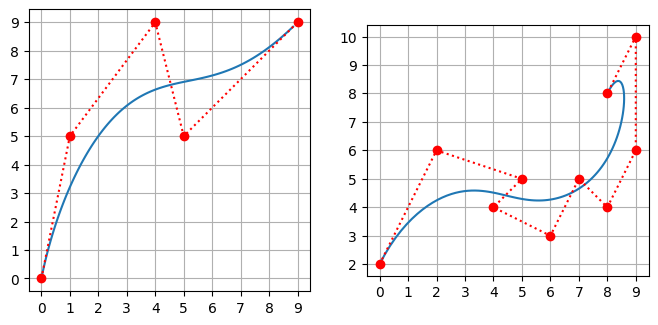

In [7]:
t_points = np.arange(0, 1, 0.01)
points1 = np.array([[0, 0], [1, 5], [4, 9], [5, 5], [9, 9]])
curve1 = Bezier(t_points, points1).Curve()

plt.figure(figsize=(8,4), dpi=100)
plt.subplot(121)
plt.xticks([i1 for i1 in range(-20, 20)]), plt.yticks([i1 for i1 in range(-20, 20)])
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(b=True, which='major', axis='both')

plt.plot(curve1[:, 0], curve1[:, 1]) 
plt.plot(points1[:, 0], points1[:, 1], 'ro:')


points2 = np.array([[0, 2], [2, 6], [5, 5], [4, 4], [6, 3], [7, 5], [8, 4], [9, 6], [9, 10], [8, 8]])
curve2 = Bezier(t_points, points2).Curve()

plt.subplot(122)
plt.xticks([i1 for i1 in range(-20, 20)]), plt.yticks([i1 for i1 in range(-20, 20)])
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(b=True, which='major', axis='both')

plt.plot(curve2[:, 0], curve2[:, 1])
plt.plot(points2[:, 0], points2[:, 1], 'ro:')

plt.show()
